# Import

In [1]:
import os
# Matplotlib
import matplotlib.pyplot as plt
# Numpy
import numpy as np
# Pillow
from PIL import Image
# Torch
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms

In [2]:
# train
dir = "dataset/train"
train_normal=len(os.listdir(os.path.join(dir,"normal")))
train_infected_covid=len(os.listdir(os.path.join(dir,"infected","covid")))
train_infected_non_covid=len(os.listdir(os.path.join(dir,"infected","non-covid")))

In [3]:
# val
dir = "dataset/val"
val_normal=len(os.listdir(os.path.join(dir,"normal")))
val_infected_covid=len(os.listdir(os.path.join(dir,"infected","covid")))
val_infected_non_covid=len(os.listdir(os.path.join(dir,"infected","non-covid")))

In [4]:
# test
dir = "dataset/test"
test_normal=len(os.listdir(os.path.join(dir,"normal")))
test_infected_covid=len(os.listdir(os.path.join(dir,"infected","covid")))
test_infected_non_covid=len(os.listdir(os.path.join(dir,"infected","non-covid")))

In [5]:
# print
print("Train")
print("Normal:", train_normal)
print("Infected:", train_infected_covid + train_infected_non_covid)
print("Infected covid:", train_infected_covid)
print("Infected non covid:", train_infected_non_covid)

print("============================================================")
print("Validation")
print("Normal:", val_normal)
print("Infected:", val_infected_covid + val_infected_non_covid)
print("Infected covid:", val_infected_covid)
print("Infected non covid:", val_infected_non_covid)

print("============================================================")
print("Test")
print("Normal:", test_normal)
print("Infected:", test_infected_covid + test_infected_non_covid)
print("Infected covid:", test_infected_covid)
print("Infected non covid:", test_infected_non_covid)

Train
Normal: 1341
Infected: 3875
Infected covid: 1345
Infected non covid: 2530
Validation
Normal: 8
Infected: 17
Infected covid: 9
Infected non covid: 8
Test
Normal: 234
Infected: 381
Infected covid: 139
Infected non covid: 242


In [6]:
# Number of images in each part of the dataset
dataset_numbers = {'train_normal': 1341,\
                   'train_infected': 3875,\
                   'train_infected_covid': 1345,\
                   'train_infected_non_covid': 2530, \
                   'val_normal': 8,\
                   'val_infected': 17, \
                   'val_infected_covid': 9,\
                   'val_infected_non_covid': 8,\
                   'test_normal': 234, \
                   'test_infected': 381, \
                   'test_infected_covid': 139, \
                   'test_infected_non_covid': 242}

# Visualization

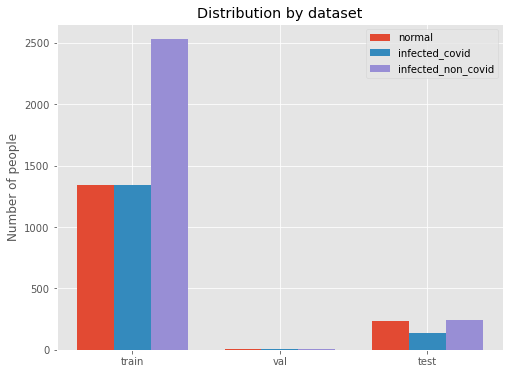

In [48]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

normal = [dataset_numbers['train_normal'], dataset_numbers['val_normal'], dataset_numbers['test_normal']]
infected_covid = [dataset_numbers['train_infected_covid'], dataset_numbers['val_infected_covid'], dataset_numbers['test_infected_covid']]
infected_non_covid = [dataset_numbers['train_infected_non_covid'], dataset_numbers['val_infected_non_covid'], dataset_numbers['test_infected_non_covid']]

X = np.arange(3)
fig = plt.figure(figsize=(8,6))
labels=['train', 'val', 'test']

ax = fig.add_subplot(111)
ax.bar(X - 0.25, normal, width = 0.25, label="normal")
ax.bar(X , infected_covid, width = 0.25, label='infected_covid')
ax.bar(X + 0.25, infected_non_covid, width = 0.25, label='infected_non_covid')
ax.set_ylabel('Number of people')
ax.set_title('Distribution by dataset')
ax.set_xticks(X)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

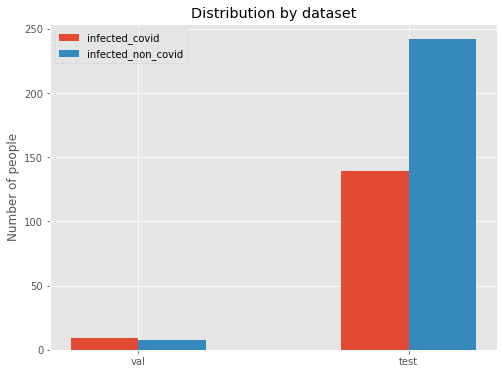

In [16]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

normal = [dataset_numbers['val_normal'], dataset_numbers['test_normal']]
infected_covid = [dataset_numbers['val_infected_covid'], dataset_numbers['test_infected_covid']]
infected_non_covid = [dataset_numbers['val_infected_non_covid'], dataset_numbers['test_infected_non_covid']]

X = np.arange(2)
fig = plt.figure(figsize=(8,6))
labels=['val', 'test']

ax = fig.add_subplot(111)
ax.bar(X - 0.125, infected_covid, width = 0.25, label='infected_covid')
ax.bar(X + 0.125, infected_non_covid, width = 0.25, label='infected_non_covid')
ax.set_ylabel('Number of people')
ax.set_title('Distribution by dataset')
ax.set_xticks(X)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

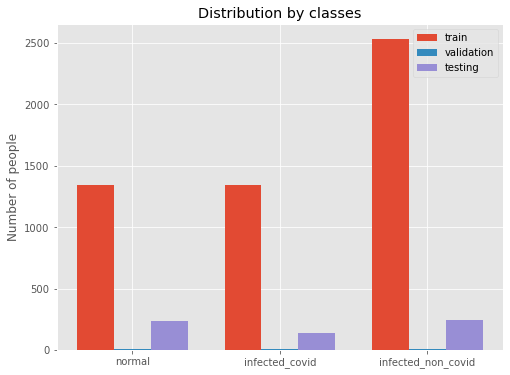

In [14]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

train_data = [dataset_numbers['train_normal'], dataset_numbers['train_infected_covid'], dataset_numbers['train_infected_non_covid']]
val_data = [dataset_numbers['val_normal'], dataset_numbers['val_infected_covid'], dataset_numbers['val_infected_non_covid']]
test_data = [dataset_numbers['test_normal'], dataset_numbers['test_infected_covid'], dataset_numbers['test_infected_non_covid']]

X = np.arange(3)
fig = plt.figure(figsize=(8,6))
labels=['normal', 'infected_covid', 'infected_non_covid']

ax = fig.add_subplot(111)
ax.bar(X - 0.25, train_data, width = 0.25, label="train")
ax.bar(X , val_data, width = 0.25, label='validation')
ax.bar(X + 0.25, test_data, width = 0.25, label='testing')
ax.set_ylabel('Number of people')
ax.set_title('Distribution by classes')
ax.set_xticks(X)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

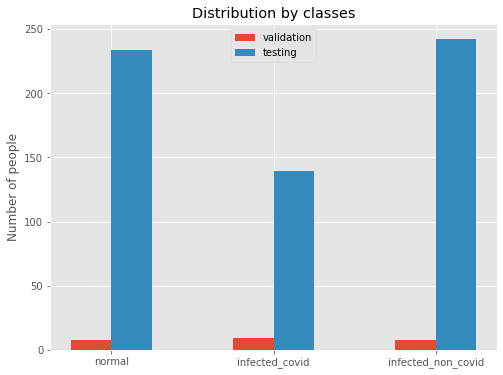

In [17]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

val_data = [dataset_numbers['val_normal'], dataset_numbers['val_infected_covid'], dataset_numbers['val_infected_non_covid']]
test_data = [dataset_numbers['test_normal'], dataset_numbers['test_infected_covid'], dataset_numbers['test_infected_non_covid']]

X = np.arange(3)
fig = plt.figure(figsize=(8,6))
labels=['normal', 'infected_covid', 'infected_non_covid']

ax = fig.add_subplot(111)
ax.bar(X - 0.125 , val_data, width = 0.25, label='validation')
ax.bar(X + 0.125, test_data, width = 0.25, label='testing')
ax.set_ylabel('Number of people')
ax.set_title('Distribution by classes')
ax.set_xticks(X)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

In [30]:
# print out the distribution
def getRatio(data):
    total = sum(data)
    return data[0]/total, data[1]/total, data[2]/total
print("Ratio of the dataset based on their classes")
print("====================================================================================")
print("Train")
normal, infected_covid, infected_non_covid = map(lambda x: round(x,3), getRatio(train_data))
print(f"normal: {normal}, infected covid: {infected_covid}, infected non-covid {infected_non_covid}")
print(f"normal: {normal}, infected: {round(infected_covid + infected_non_covid,3)}")
print("====================================================================================")
print("Testing")
normal, infected_covid, infected_non_covid = map(lambda x: round(x,3), getRatio(test_data))
print(f"normal: {normal}, Infected covid: {infected_covid}, infected non-covid {infected_non_covid}")
print(f"normal: {normal}, infected: {round(infected_covid + infected_non_covid,3)}")
print("====================================================================================")
print("Validation")
normal, infected_covid, infected_non_covid = map(lambda x: round(x,3), getRatio(val_data))
print(f"normal: {normal}, Infected covid: {infected_covid}, infected non-covid {infected_non_covid}")
print(f"normal: {normal}, infected: {round(infected_covid + infected_non_covid,3)}")

Ratio of the dataset based on their classes
Train
normal: 0.257, infected covid: 0.258, infected non-covid 0.485
normal: 0.257, infected: 0.743
Testing
normal: 0.38, Infected covid: 0.226, infected non-covid 0.393
normal: 0.38, infected: 0.619
Validation
normal: 0.32, Infected covid: 0.36, infected non-covid 0.32
normal: 0.32, infected: 0.68


In [48]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
def plotPie(data, labels, title):
    fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))

    def func(pct, allvals):
        return "{:.1f}%".format(pct)


    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                      textprops=dict(color="w"))

    ax.legend(wedges, labels,
              title="Class",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=8, weight="bold")

    ax.set_title(title)

    plt.show()

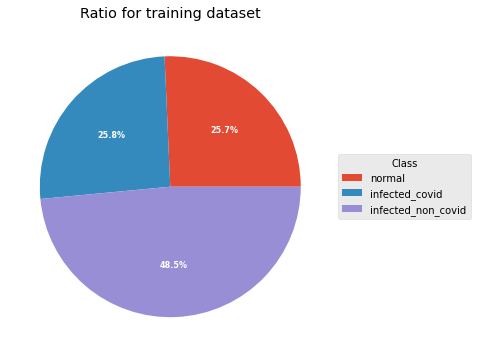

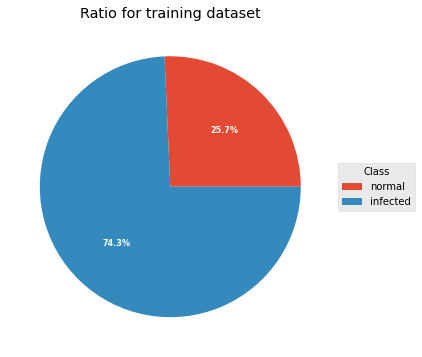

In [51]:
data = list(map(lambda x: round(x,3), getRatio(train_data)))
labels = ['normal', 'infected_covid', 'infected_non_covid']
plotPie(data, labels, "Ratio for training dataset")
data = list(map(lambda x: round(x,3), getRatio(train_data)))
data = [data[0], data[1]+data[2]]
labels = ['normal', 'infected']
plotPie(data, labels, "Ratio for training dataset")

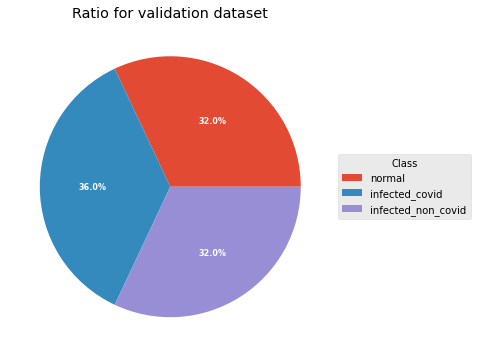

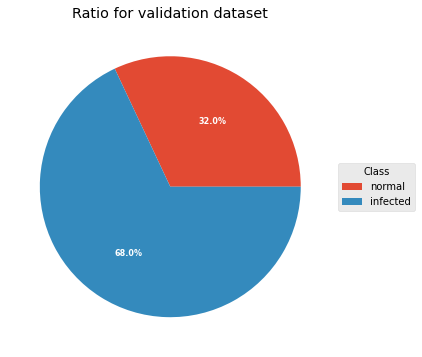

In [52]:
data = list(map(lambda x: round(x,3), getRatio(val_data)))
labels = ['normal', 'infected_covid', 'infected_non_covid']
plotPie(data, labels, "Ratio for validation dataset")
data = list(map(lambda x: round(x,3), getRatio(val_data)))
data = [data[0], data[1]+data[2]]
labels = ['normal', 'infected']
plotPie(data, labels, "Ratio for validation dataset")

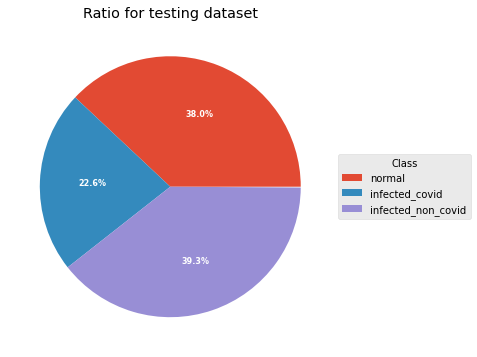

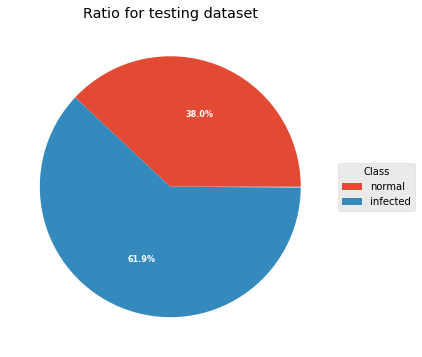

In [53]:
data = list(map(lambda x: round(x,3), getRatio(test_data)))
labels = ['normal', 'infected_covid', 'infected_non_covid']
plotPie(data, labels, "Ratio for testing dataset")
data = list(map(lambda x: round(x,3), getRatio(test_data)))
data = [data[0], data[1]+data[2]]
labels = ['normal', 'infected']
plotPie(data, labels, "Ratio for testing dataset")

# Data Loader for three-classes classifier

In [2]:
from dataloader import Lung_Dataset
# Test
bs = 4
ld_train = Lung_Dataset(groups="train")
ld_val = Lung_Dataset(groups="val")
ld_test = Lung_Dataset(groups="test")
train_loader = DataLoader(ld_train, batch_size = bs, shuffle = True)
test_loader = DataLoader(ld_test, batch_size = bs, shuffle = True)
val_loader = DataLoader(ld_val, batch_size = bs, shuffle = True)

print(train_loader)
print(val_loader)
print(test_loader)

In [3]:
for k, v in enumerate(test_loader):
    print("-----")
    print(k)
    print(v[0].shape)
    # Forced stop
    break

-----
0
torch.Size([4, 1, 150, 150])


# Data Loader for two binary classifier

In [4]:
from dataloader import Binary_Lung_Dataset

# Test
bs = 4
ld_train = Binary_Lung_Dataset(groups="train",  classify="normal")
ld_val = Binary_Lung_Dataset(groups="val", classify="normal")
ld_test = Binary_Lung_Dataset(groups="test",  classify="normal")
train_loader = DataLoader(ld_train, batch_size = bs, shuffle = True)
test_loader = DataLoader(ld_test, batch_size = bs, shuffle = True)
val_loader = DataLoader(ld_val, batch_size = bs, shuffle = True)

print(train_loader)
print(val_loader)
print(test_loader)

In [5]:
for k, v in enumerate(test_loader):
    print("-----")
    print(k)
    print(v[0].shape)
    # Forced stop
    break

-----
0
torch.Size([4, 1, 150, 150])


In [6]:
# Test
bs = 4
ld_train = Binary_Lung_Dataset(groups="train",  classify="infected")
ld_val = Binary_Lung_Dataset(groups="val", classify="infected")
ld_test = Binary_Lung_Dataset(groups="test",  classify="infected")
train_loader = DataLoader(ld_train, batch_size = bs, shuffle = True)
test_loader = DataLoader(ld_test, batch_size = bs, shuffle = True)
val_loader = DataLoader(ld_val, batch_size = bs, shuffle = True)

print(train_loader)
print(val_loader)
print(test_loader)

In [7]:
for k, v in enumerate(test_loader):
    print("-----")
    print(k)
    print(v[0].shape)
    # Forced stop
    break

-----
0
torch.Size([4, 1, 150, 150])
